**WorkShop 3 - DNN Tabular**
- Mateo Cano Solis - 1037660293
- Keyla Jeaneth Garcia Jaimes - 1026159841


# Coding classification using Deep Learning from tabular data

In this notebook, we'll go through the code for the coding companion for Regression to create your very first neural network to predict whether the house price is below or above median value. We will go through the following in this notebook:

- Exploring and Processing the Data
- Building and Training our Neural Network
- Visualizing Loss and Accuracy
- Adding Regularization to our Neural Network

The code is ready to run using house price data. Note that the results might differ because a degree of randomness in the way we split our dataset as well as the initialization of our neural network.

This notebook is based on the work of Joseph Lee Wei En, 2019 at medium.com

# Exploring and Processing the Data

We first have to read in the CSV file that we've been given. We'll use a package called pandas for that:

In [ ]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('Tabular/housepricedata.csv', sep = ',', ) #wherever resides your data, if .ipnb and .csv are in the same folder no need to worry!
df.head(5)


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [ ]:
print(len(df. columns))
len(df)


11


1460

The dataset that we have now is in what is called a pandas dataframe. To convert it to an array, simply access its values:

In [ ]:
dataset = df.values

In [ ]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

Now, we choose our input features and the label we wish to predict.

In [ ]:
X = dataset[:,0:10]
Y = dataset[:,10]

Normalizing our data is very important, as we want the input features to be on the same order of magnitude to make our training easier. We'll use a min-max scaler from scikit-learn which scales our data to be between 0 and 1.

In [ ]:
from sklearn import preprocessing

In [ ]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=0e6f624091ed41e6e814cdaf0f703d145cf07af5359145b371c2e131a4044f82
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [ ]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

Lastly, we wish to set aside some parts of our dataset for a validation set and a test set. We use the function train_test_split from scikit-learn to do that.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [ ]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


# Building and Training Our First Neural Network For "Regression-Classification"

We will be using Keras to build our architecture. Let's import the code from Keras that we will need to use:

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

We will be using the Sequential model, which means that we merely need to describe the layers above in sequence. Our neural network has three layers:

- Hidden layer 1: 32 neurons, ReLU activation
- Hidden layer 2: 32 neurons, ReLU activation
- Output Layer: 1 neuron, Sigmoid activation

In [ ]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])


Now that we've got our architecture specified, we need to find the best numbers for it. Before we start our training, we have to configure the model by
- Telling it what algorithm you want to use to do the optimization (we'll use stochastic gradient descent)
- Telling it what loss function to use (for binary classification, we will use binary cross entropy)
- Telling it what other metrics you want to track apart from the loss function (we want to track accuracy as well)

We do so below:

In [ ]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Training on the data is pretty straightforward and requires us to write one line of code. The function is called 'fit' as we are fitting the parameters to the data. We specify:
- what data we are training on, which is X_train and Y_train
- the size of our mini-batch 
- how long we want to train it for (epochs)
- what our validation data is so that the model will tell us how we are doing on the validation data at each point.

This function will output a history, which we save under the variable hist. We'll use this variable a little later.

In [ ]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 0.7131 - accuracy: 0.5049 - val_loss: 0.7083 - val_accuracy: 0.4932
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6972 - accuracy: 0.5020 - val_loss: 0.6944 - val_accuracy: 0.4886
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6859 - accuracy: 0.5274 - val_loss: 0.6835 - val_accuracy: 0.5982
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6773 - accuracy: 0.7123 - val_loss: 0.6750 - val_accuracy: 0.7032
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6706 - accuracy: 0.7280 - val_loss: 0.6685 - val_accuracy: 0.7123
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6655 - accuracy: 0.7260 - val_loss: 0.6635 - val_accuracy: 0.7260
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6610 - accuracy: 0.7378 - val_loss: 0.6588 - val_accuracy: 0.7352
Epoch 8/100
3

Evaluating our data on the test set:

In [ ]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 3ms/step - loss: 0.2606 - accuracy: 0.9087


0.9086757898330688

# Visualizing Loss and Accuracy

Import the relevant package we need to do the visualization

In [ ]:
import matplotlib.pyplot as plt

We want to visualize the training loss and the validation loss like this:

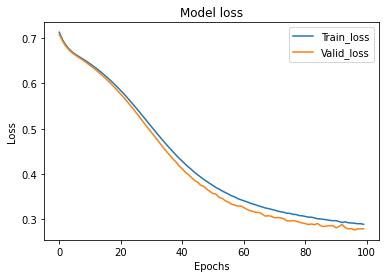

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train_loss', 'Valid_loss'], loc='upper right')
plt.show()

We can also visualize the training accuracy and the validation accuracy like this:

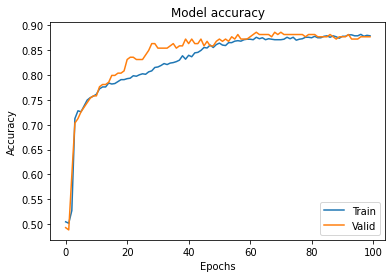

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Valid'], loc='lower right')
plt.show()

# Adding Regularization to our Neural Network

We'll train a model which will overfit, which we call Model 2. This might take a few minutes.

In [ ]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

# using adaptative moment estimation (adam)

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 4s 83ms/step - loss: 0.4915 - accuracy: 0.7818 - val_loss: 0.4151 - val_accuracy: 0.8493
Epoch 2/100
32/32 [==============================] - 2s 63ms/step - loss: 0.3524 - accuracy: 0.8483 - val_loss: 0.3351 - val_accuracy: 0.8721
Epoch 3/100
32/32 [==============================] - 2s 73ms/step - loss: 0.3208 - accuracy: 0.8689 - val_loss: 0.3108 - val_accuracy: 0.8721
Epoch 4/100
32/32 [==============================] - 2s 69ms/step - loss: 0.2940 - accuracy: 0.8777 - val_loss: 0.2726 - val_accuracy: 0.8904
Epoch 5/100
32/32 [==============================] - 2s 67ms/step - loss: 0.2811 - accuracy: 0.8787 - val_loss: 0.2711 - val_accuracy: 0.8858
Epoch 6/100
32/32 [==============================] - 2s 68ms/step - loss: 0.2906 - accuracy: 0.8777 - val_loss: 0.2609 - val_accuracy: 0.8950
Epoch 7/100
32/32 [==============================] - 2s 70ms/step - loss: 0.2528 - accuracy: 0.8973 - val_loss: 0.2990 - val_accuracy: 0.8904
Epoch 

Let's do the same visualization to see what overfitting looks like in terms of the loss and accuracy.

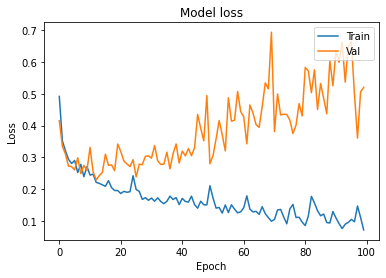

In [ ]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

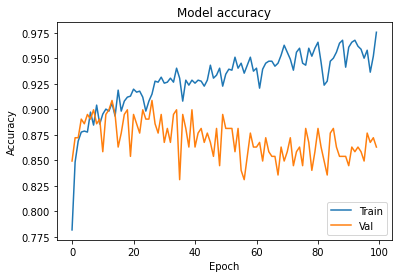

In [ ]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

To address the overfitting we see in Model 2, we'll incorporate L2 regularization and dropout in our third model here (Model 3).

In [ ]:
from keras.layers import Dropout
from keras import regularizers

In [ ]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.1), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.1)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.1)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.1)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.1)),
])

In [ ]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 5s 92ms/step - loss: 135.1114 - accuracy: 0.5039 - val_loss: 32.3976 - val_accuracy: 0.4886
Epoch 2/100
32/32 [==============================] - 3s 82ms/step - loss: 11.0191 - accuracy: 0.5127 - val_loss: 1.7128 - val_accuracy: 0.4886
Epoch 3/100
32/32 [==============================] - 3s 88ms/step - loss: 0.9495 - accuracy: 0.5127 - val_loss: 0.7174 - val_accuracy: 0.4886
Epoch 4/100
32/32 [==============================] - 3s 79ms/step - loss: 0.7025 - accuracy: 0.5127 - val_loss: 0.6949 - val_accuracy: 0.4886
Epoch 5/100
32/32 [==============================] - 1s 45ms/step - loss: 0.6935 - accuracy: 0.5127 - val_loss: 0.6934 - val_accuracy: 0.4886
Epoch 6/100
32/32 [==============================] - 1s 46ms/step - loss: 0.6930 - accuracy: 0.5127 - val_loss: 0.6935 - val_accuracy: 0.4886
Epoch 7/100
32/32 [==============================] - 1s 46ms/step - loss: 0.6930 - accuracy: 0.5127 - val_loss: 0.6935 - val_accuracy: 0.4886
Ep

We'll now plot the loss and accuracy graphs for Model 3. You'll notice that the loss is a lot higher at the start, and that's because we've changed our loss function. To plot such that the window is zoomed in between 0 and 1.2 for the loss, we add an additional line of code (plt.ylim) when plotting

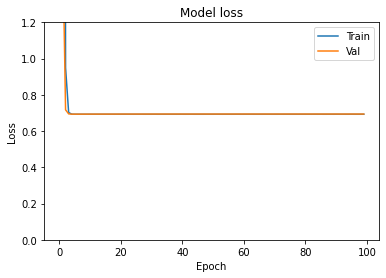

In [ ]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

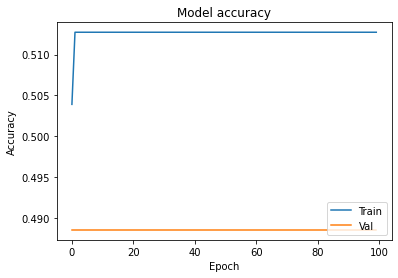

In [ ]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Epoch 1/100
32/32 [==============================] - 3s 53ms/step - loss: 2.2529 - accuracy: 0.7133 - val_loss: 1.3356 - val_accuracy: 0.7580
Epoch 2/100
32/32 [==============================] - 2s 47ms/step - loss: 0.9300 - accuracy: 0.8523 - val_loss: 0.7297 - val_accuracy: 0.8676
Epoch 3/100
32/32 [==============================] - 1s 46ms/step - loss: 0.6494 - accuracy: 0.8669 - val_loss: 0.5695 - val_accuracy: 0.8767
Epoch 4/100
32/32 [==============================] - 2s 47ms/step - loss: 0.5708 - accuracy: 0.8659 - val_loss: 0.6283 - val_accuracy: 0.7808
Epoch 5/100
32/32 [==============================] - 1s 46ms/step - loss: 0.5012 - accuracy: 0.8679 - val_loss: 0.4529 - val_accuracy: 0.8858
Epoch 6/100
32/32 [==============================] - 1s 46ms/step - loss: 0.4356 - accuracy: 0.8826 - val_loss: 0.4039 - val_accuracy: 0.8904
Epoch 7/100
32/32 [==============================] - 1s 46ms/step - loss: 0.3983 - accuracy: 0.8865 - val_loss: 0.4289 - val_accuracy: 0.8858
Epoch 

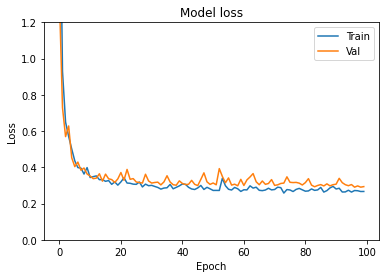

In [ ]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.001)),
])

model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

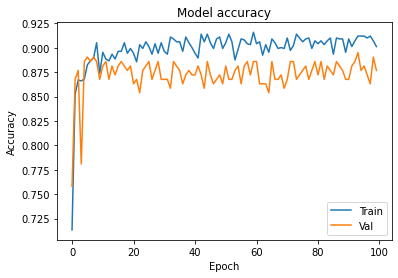

In [ ]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

As compared to Model 2, you should see that there's less overfitting!

In [ ]:
model_3v2 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(10,)),
    Dropout(0.5),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.001)),
])

In [ ]:
model_3v2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3v2 = model_3v2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 53ms/step - loss: 2.5391 - accuracy: 0.7182 - val_loss: 1.6536 - val_accuracy: 0.8356
Epoch 2/100
32/32 [==============================] - 2s 48ms/step - loss: 1.3640 - accuracy: 0.8249 - val_loss: 1.1014 - val_accuracy: 0.8539
Epoch 3/100
32/32 [==============================] - 1s 46ms/step - loss: 0.9653 - accuracy: 0.8532 - val_loss: 0.8433 - val_accuracy: 0.8493
Epoch 4/100
32/32 [==============================] - 1s 45ms/step - loss: 0.7831 - accuracy: 0.8620 - val_loss: 0.6983 - val_accuracy: 0.8767
Epoch 5/100
32/32 [==============================] - 1s 45ms/step - loss: 0.6764 - accuracy: 0.8611 - val_loss: 0.6066 - val_accuracy: 0.8767
Epoch 6/100
32/32 [==============================] - 1s 46ms/step - loss: 0.5943 - accuracy: 0.8669 - val_loss: 0.5452 - val_accuracy: 0.8767
Epoch 7/100
32/32 [==============================] - 1s 46ms/step - loss: 0.5526 - accuracy: 0.8787 - val_loss: 0.5053 - val_accuracy: 0.8813
Epoch 

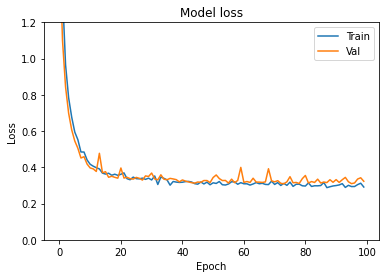

In [ ]:
plt.plot(hist_3v2.history['loss'])
plt.plot(hist_3v2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

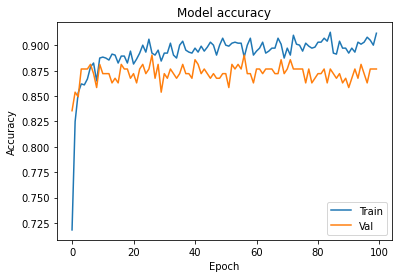

In [ ]:
plt.plot(hist_3v2.history['accuracy'])
plt.plot(hist_3v2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

What do you think? you decide which dp is better !

Epoch 1/100
32/32 [==============================] - 3s 55ms/step - loss: 3.0085 - accuracy: 0.4843 - val_loss: 2.5818 - val_accuracy: 0.5023
Epoch 2/100
32/32 [==============================] - 2s 48ms/step - loss: 2.4465 - accuracy: 0.5352 - val_loss: 2.2412 - val_accuracy: 0.6621
Epoch 3/100
32/32 [==============================] - 2s 49ms/step - loss: 2.0919 - accuracy: 0.7241 - val_loss: 1.8991 - val_accuracy: 0.7808
Epoch 4/100
32/32 [==============================] - 2s 49ms/step - loss: 1.8035 - accuracy: 0.8229 - val_loss: 1.6198 - val_accuracy: 0.8584
Epoch 5/100
32/32 [==============================] - 2s 49ms/step - loss: 1.6255 - accuracy: 0.8082 - val_loss: 1.4775 - val_accuracy: 0.8402
Epoch 6/100
32/32 [==============================] - 2s 49ms/step - loss: 1.4621 - accuracy: 0.8258 - val_loss: 1.3662 - val_accuracy: 0.8174
Epoch 7/100
32/32 [==============================] - 2s 50ms/step - loss: 1.3173 - accuracy: 0.8405 - val_loss: 1.2134 - val_accuracy: 0.8584
Epoch 

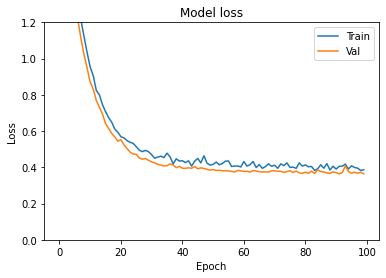

In [ ]:
model_3v2 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(10,)),
    Dropout(0.8),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.8),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.8),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.8),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.001)),
])

model_3v2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3v2 = model_3v2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

plt.plot(hist_3v2.history['loss'])
plt.plot(hist_3v2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

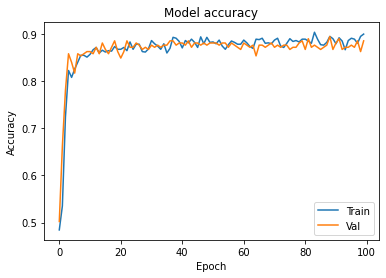

In [ ]:
plt.plot(hist_3v2.history['accuracy'])
plt.plot(hist_3v2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Regression (Finding a value)

Which features are available in the dataset?

Which features are categorical?

Which features are numerical?

Which features contain blank, null or empty values?

What are the data types for various features?

What is the distribution of numerical feature values across the samples?

Which features are more correlated to the price?

Dataset
This dataset contains house sale prices for King County, which includes Seattle.
It includes homes sold between May 2014 and May 2015.
21 columns. (features)
21597 rows.
Feature Columns

id: Unique ID for each home sold

date: Date of the home sale

price: Price of each home sold

bedrooms: Number of bedrooms

bathrooms: Number of bathrooms, where .5 accounts for a room with a toilet but no shower

sqft_living: Square footage of the apartments interior living space

sqft_lot: Square footage of the land space

floors: Number of floors

waterfront: - A dummy variable for whether the apartment was overlooking the waterfront or not

view: An index from 0 to 4 of how good the view of the property was

condition: - An index from 1 to 5 on the condition of the apartment,

grade: An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

sqft_above: The square footage of the interior housing space that is above ground level

sqft_basement: The square footage of the interior housing space that is below ground level

yr_built: The year the house was initially built

yr_renovated: The year of the house’s last renovation

zipcode: What zipcode area the house is in

lat: Lattitude

long: Longitude

sqft_living15: The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15: The square footage of the land lots of the nearest 15 neighbors

In [ ]:
# data analysis
import pandas as pd
import numpy as np

# models
from keras import layers
from keras import preprocessing
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam   # if keras does not find it


# preprocessing
from sklearn import preprocessing

# Split
from sklearn.model_selection import train_test_split

In [ ]:
housePrices=pd.read_csv('Tabular/kc_house_data.csv')
print(len(housePrices))

# preview the data desde la cabeza
housePrices.head()


21613


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
housePrices.tail()  # previewing the data from the backwards, this is from the tail !

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
len(housePrices.columns)

21

In [ ]:
housePrices.dtypes   # Investigation data types is always good !  object type are strings**

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
housePrices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Which features contain blank, null or empty values?

We can check for missing values with pandas isnull(). This indicates whether values are missing or not. Then we can sum all the values to check every column.

In [ ]:
# Number of null values per feature
housePrices.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

What is the distribution of numerical feature values across the samples?

In [ ]:
housePrices.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


__Correlating__

We want to know how well does each feature correlate with Price. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

__Completing__

Since there are no missing values we do not need to complete any values.

__Correcting__

Id feature may be dropped from our analysis since it does not add value. Date feature may be dropped since we are going to do feature engineering and make a year and month column. Zipcode feature is a special case, we could use it, but since we do not know exactly the zones of King County we are just going to drop it. Treat strings as categories. Although Zip code is numeric, we cannot treat it as a number in the model, it may be converted to a string.

__Creating__

We may want to create a new feature called Year based on Date to analyze the price change throughout the years. We may want to create a new feature called Month based on Date to analyze the price change throughout the months.

Analyze by visualizing data == __Pearson correlation matrix__

coefficient to examine the strength and direction of the linear relationship between two continuous variables.

The correlation coefficient can range in value from −1 to +1. The larger the absolute value of the coefficient, the stronger the relationship between the variables. For the Pearson correlation, an absolute value of 1 indicates a perfect linear relationship. A correlation close to 0 indicates no linear relationship between the variables.

The sign of the coefficient indicates the direction of the relationship. If both variables tend to increase or decrease together, the coefficient is positive, and the line that represents the correlation slopes upward. If one variable tends to increase as the other decreases, the coefficient is negative, and the line that represents the correlation slopes downward.

In [ ]:
pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


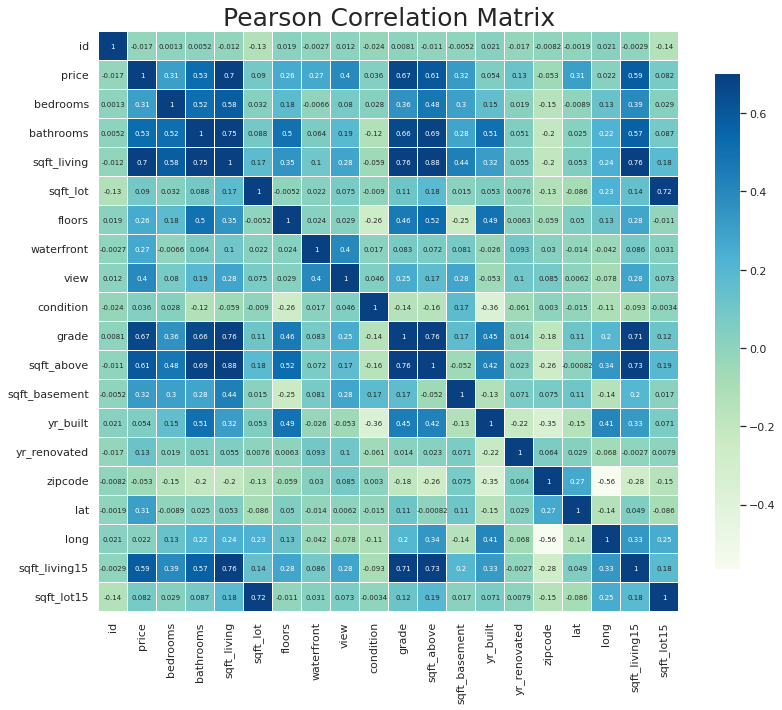

In [ ]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(13,13))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(housePrices.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":7}, cbar_kws={"shrink": .7})

Which features are more correlated to the price?

This allow us to explore labels that are highly correlated to the price.
sqft_living looks like a highly correlated label to the price, as well as grade, sqft_above, sqft_living15 and bathrooms.

In [ ]:
price_corr = housePrices.corr()['price'].sort_values(ascending=False)
print(price_corr)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


__Price feature__

Most of the house prices are between 0 and 1,500,000.

The average house price is $540,000.

Keep in mind that it may be a good idea to drop extreme values. For instance, we could focus on house from 0 to $3,000,000 and 
drop the other ones.

It seems that there is a positive linear relationship between the price and sqft_living.

An increase in living space generally corresponds to an increase in house price.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


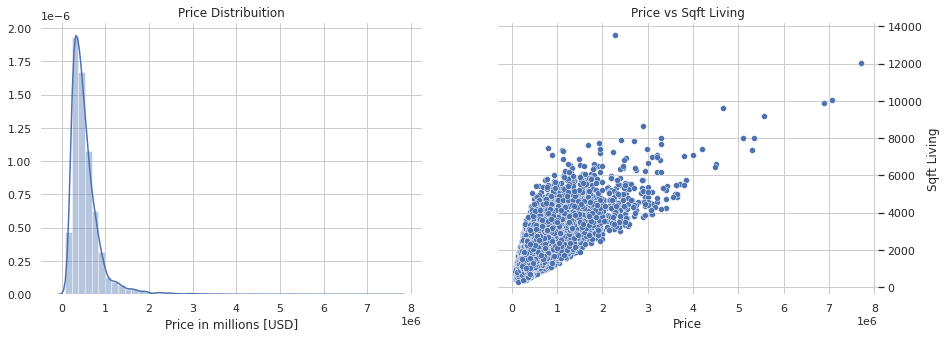

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.distplot(housePrices['price'], ax=axes[0])
sns.scatterplot(x='price',y='sqft_living', data=housePrices, ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Price in millions [USD]', ylabel='', title='Price Distribuition')
axes[1].set(xlabel='Price', ylabel='Sqft Living', title='Price vs Sqft Living')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

__Bedrooms and floors box plots__

Box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot. Outliers may be plotted as individual points. The spacings between the different parts of the box indicate the degree of dispersion (spread).

We can see outliers plotted as individual points; this probably are the more expensive houses.
We can see that the price tends to go up when the house has more bedrooms.

[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Floors'),
 Text(0.5, 1.0, 'Floors vs Price Box Plot')]

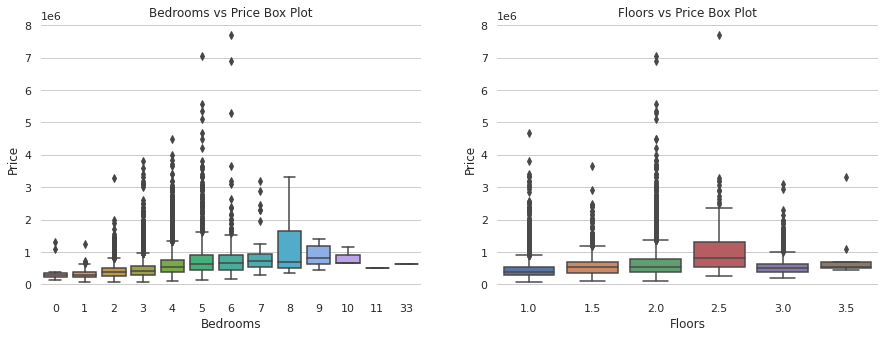

In [ ]:
sns.set(style="whitegrid", font_scale=1)

f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=housePrices['bedrooms'],y=housePrices['price'], ax=axes[0])
sns.boxplot(x=housePrices['floors'],y=housePrices['price'], ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Bedrooms', ylabel='Price', title='Bedrooms vs Price Box Plot')
axes[1].set(xlabel='Floors', ylabel='Price', title='Floors vs Price Box Plot')

__Waterfront, view and grade box plots__

Waterfront houses tends to have a better price value.
The price of waterfront houses tends to be more disperse and the price of houses without waterfront tend to be more concentrated.
Grade and waterfront effect price. View seem to effect less but it also has an effect on price.

[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Grade'),
 Text(0.5, 1.0, 'Grade vs Price Box Plot')]

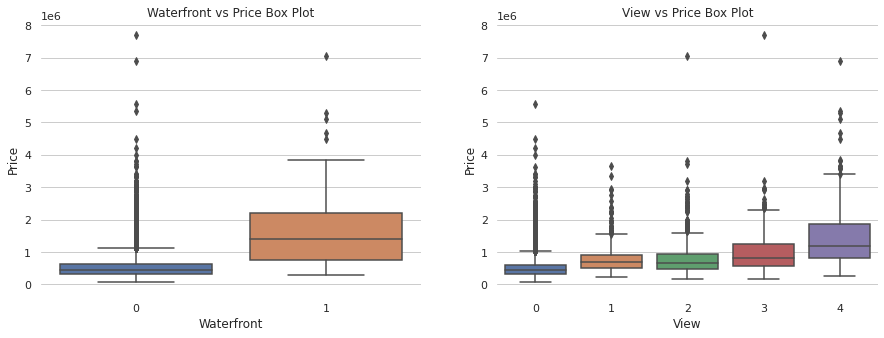

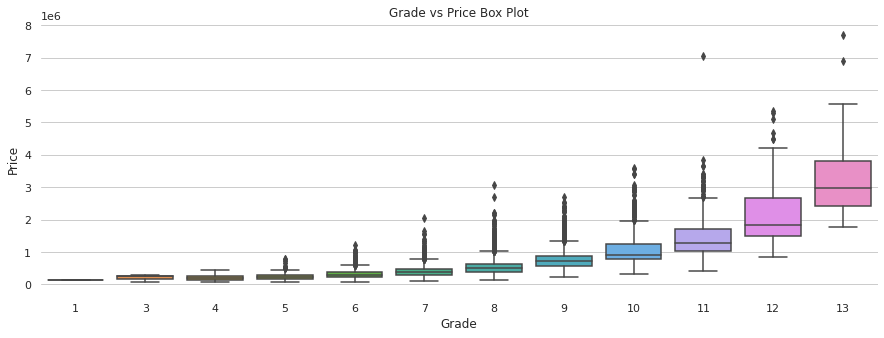

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=housePrices['waterfront'],y=housePrices['price'], ax=axes[0])
sns.boxplot(x=housePrices['view'],y=housePrices['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Waterfront', ylabel='Price', title='Waterfront vs Price Box Plot')
axes[1].set(xlabel='View', ylabel='Price', title='View vs Price Box Plot')

f, axe = plt.subplots(1, 1,figsize=(15,5))
sns.boxplot(x=housePrices['grade'],y=housePrices['price'], ax=axe)
sns.despine(left=True, bottom=True)
axe.set(xlabel='Grade', ylabel='Price', title='Grade vs Price Box Plot')

__Working with Feature Data = Feature engineering__

__Correcting by dropping features__

By dropping features, we are dealing with fewer data points. Speeds up our notebook and eases the analysis. Based on our assumptions and decisions we want to drop the Id, zipcode and Date features.

In [ ]:

housePrices = housePrices.drop('id',axis=1)
housePrices = housePrices.drop('zipcode',axis=1)
print(housePrices.columns.values)


['date' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors'
 'waterfront' 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement'
 'yr_built' 'yr_renovated' 'lat' 'long' 'sqft_living15' 'sqft_lot15']


We want to engineer the date feature to make a year and month column. The feature date is as a string. With pd.to_datetime we can convert an argument to datetime.

In [ ]:
housePrices['date'] = pd.to_datetime(housePrices['date'])

housePrices['month'] = housePrices['date'].apply(lambda date:date.month)
housePrices['year'] = housePrices['date'].apply(lambda date:date.year)

housePrices = housePrices.drop('date',axis=1)

# Check the new columns
print(housePrices.columns.values)

['price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors'
 'waterfront' 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement'
 'yr_built' 'yr_renovated' 'lat' 'long' 'sqft_living15' 'sqft_lot15'
 'month' 'year']


__House price trends, Price vs month, vs year__

Looking the box plots we notice that there is not a big difference between 2014 and 2015.
The number of houses sold by month tends to be similar every month.
The line plot show that around April there is an increase in house prices.

[Text(0, 0.5, 'Price'), Text(0.5, 0, 'Month'), Text(0.5, 1.0, 'Price Trends')]

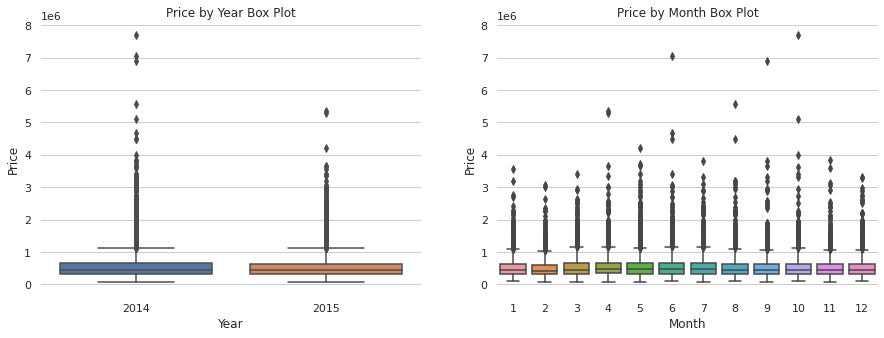

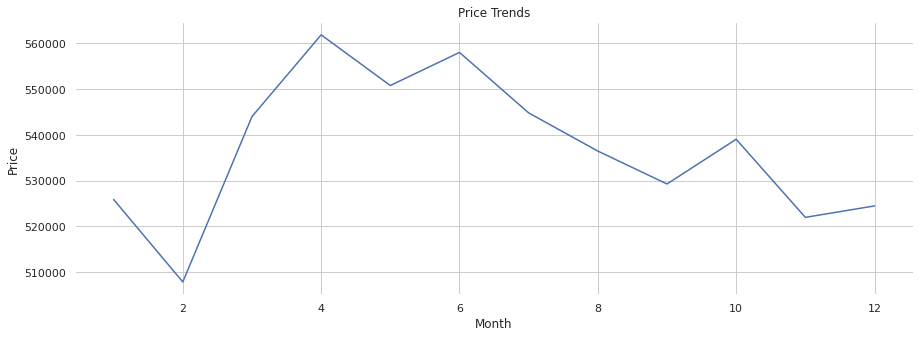

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x='year',y='price',data=housePrices, ax=axes[0])
sns.boxplot(x='month',y='price',data=housePrices, ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Year', ylabel='Price', title='Price by Year Box Plot')
axes[1].set(xlabel='Month', ylabel='Price', title='Price by Month Box Plot')

f, axe = plt.subplots(1, 1,figsize=(15,5))
housePrices.groupby('month').mean()['price'].plot()
sns.despine(left=True, bottom=True)
axe.set(xlabel='Month', ylabel='Price', title='Price Trends')

__Splitting data into training, validation and testing__

Instead of a class, Regression problems are measured by a `mean squared error or "MSE"`

Again, in supervised learning, we are training our model with a given dataset of examples f(X) = y, where X are a set of variables, y is the value to predict and f is the DNN !

In [ ]:
# Features
X = housePrices.drop('price',axis=1)

# Label
y = housePrices['price']

# Split
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(15129, 19)
(6484, 19)
(15129,)
(6484,)


__Scaling Data__

In Machine Learning, including Deep Learning, Gaussian distributions are the key, so adjusting data to gaussian is kean
Even more, having a standard deviation of 1 and median of 0 is ideal.

fit_transform(X[, y]): Fit to data, then transform it.
transform(X): Scale features of X according to feature_range.


In [ ]:
# scaling and train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)

# transform for avoiding data leakage
X_valid = scaler.transform(X_valid)

# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.0000000000000002
Min:  0.0


__Creating a model == The f, the DNN__

We estimate the number of neurons (units) from our features. Ex: X_train.shape (15129, 19). The optimizer is asking how you want to perform this gradient descent. In this case we are using the Adam optimizer and the mean square error loss function.

In [ ]:
model = Sequential()

# input layer
model.add(Dense(19,activation='relu'))

# hidden layers
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

# output layer
model.add(Dense(1))  # This is the decision layer class or value depending on the need !

model.compile(optimizer='adam',loss='mse')

__Training the model, the f, the DNN__

Now that the model, architecture, 'stomach' is ready, we can fit the model into the data.

Since the dataset is large, we are going to use batch_size. It is typical to use batches of the power of 2 (32, 64, 128, 256...). In this case we are using 128. The smaller the batch size, the longer is going to take.


In [ ]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_valid,y_valid.values),
          batch_size=128,epochs=400)


Epoch 1/400
119/119 [==============================] - 1s 4ms/step - loss: 423625981952.0000 - val_loss: 433003397120.0000
Epoch 2/400
119/119 [==============================] - 0s 3ms/step - loss: 422135562240.0000 - val_loss: 427478777856.0000
Epoch 3/400
119/119 [==============================] - 0s 4ms/step - loss: 399743483904.0000 - val_loss: 375277518848.0000
Epoch 4/400
119/119 [==============================] - 1s 5ms/step - loss: 296737210368.0000 - val_loss: 217778929664.0000
Epoch 5/400
119/119 [==============================] - 1s 7ms/step - loss: 142888747008.0000 - val_loss: 109007847424.0000
Epoch 6/400
119/119 [==============================] - 1s 7ms/step - loss: 99449298944.0000 - val_loss: 103125000192.0000
Epoch 7/400
119/119 [==============================] - 1s 6ms/step - loss: 97139032064.0000 - val_loss: 101357944832.0000
Epoch 8/400
119/119 [==============================] - 1s 8ms/step - loss: 95551791104.0000 - val_loss: 99635281920.0000
Epoch 9/400
119/119 

__Training loss per epoch__

This plot shows the training loss per epoch.
This plot helps us to see if there is overfitting in the model. In this case there is no overfitting because both lines go down at the same time.

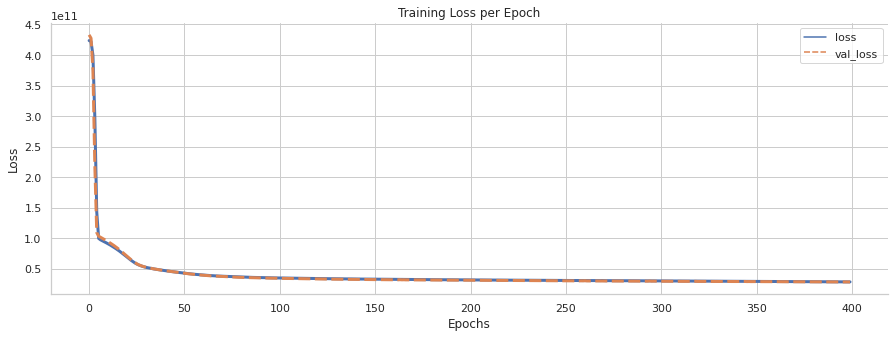

In [ ]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')
sns.despine()

__Regression Evaluation Metrics__

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

n∑i=1/n|yi−y^i|
 
Mean Squared Error (MSE) is the mean of the squared errors:

n∑i=1/n(yi−y^i)2
 
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

n∑i=1 √1/n(yi−y^i)2
 

__Comparing these metrics__

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

__Prediction (What we do on brand new data)__

In this part we are giving the model the test set to get a list of predictions. Then we compare the correct values with the list of predictions. We use different metrics to compare the predictions, in this case we use MAE, MSE, RMSE and Variance Regression Score.

Let us start by analyzing the MAE, which is 103,500. This means that our model is off on average about `$100,000`.

Is that MAE good or bad?

For that we must take into account our original data set and see what kind of values we have. For instance, the mean is 540,000, therefore the MEA is about 19% of the mean price. This is not a particularly good result.

To better understand this error, we can use the variance regression score, where the best possible score is 1.0 and lower values are worse. This tells you how much variance is being explain by your model. In our case we have 0.80 which is a normal result.

In [ ]:
# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
# predictions on the test set
predictions = model.predict(X_valid)

print('MAE: ', mean_absolute_error(y_valid,predictions))
print('MSE: ', mean_squared_error(y_valid,predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_valid,predictions)))
print('Variance Regression Score: ', explained_variance_score(y_valid,predictions))

print('\n\nDescriptive Statistics:\n',housePrices['price'].describe())

MAE:  103635.83293853138
MSE:  28154312356.321247
RMSE:  167792.46811558987
Variance Regression Score:  0.7993090316405191


Descriptive Statistics:
 count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


__Model predictions vs perfect fit__

We can compare the model predictions with a perfect fit to see how accurate the model is.

The red line represents the perfect prediction.

We are being punish by the outliers, which are the expensive houses. Our model is not good predicting luxury houses.

On the other hand, our model is good predicting the price of houses between 0 and $2 million. There is clearly a good fit.

It may be worth it retraining our model just on price houses below $3 million.  df[df['price'] <= 3000000]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 0, 'Test True Y'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

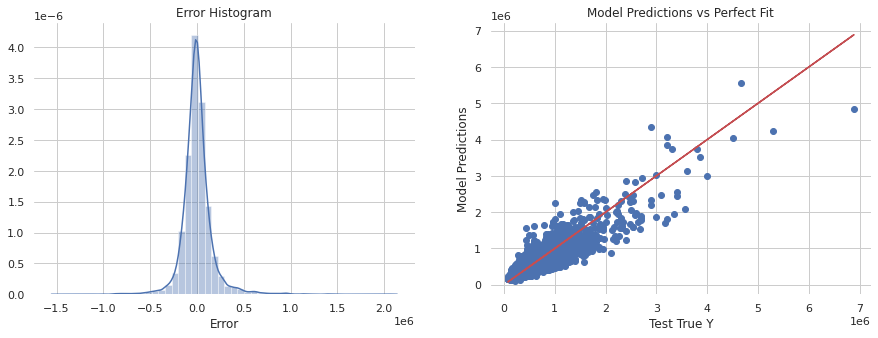

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(y_valid,predictions)

# Perfect predictions
plt.plot(y_valid,y_valid,'r')

errors = y_valid.values.reshape(6484, 1) - predictions
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

__Predicting a new comer house__

We are going to use the model to predict the price on a brand-new house. We are going to choose the first house of the data set and drop the price. single_house is going to have all the features that we need to predict the price. After that we need to reshape the variable and scale the features.

The original price is 221,900 and the model prediction is ~ $285,000.


In [ ]:
# features of new house
single_house = housePrices.drop('price',axis=1).iloc[0]
print(f'Features of new house:\n {single_house}')

# reshape the numpy array and scale the features
single_house = scaler.transform(single_house.values.reshape(-1, 19))

# run the model and get the price prediction
print('\nPrediction Price:', model.predict(single_house)[0,0])

# original price
print('\nOriginal Price:', housePrices.iloc[0]['price'])

Features of new house:
 bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
month              10.0000
year             2014.0000
Name: 0, dtype: float64

Prediction Price: 273548.84

Original Price: 221900.0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


## Eliminando outliers superiores a 3M

In [ ]:
housePrices=pd.read_csv('Tabular/kc_house_data.csv')
housePrices = housePrices[housePrices['price'] <= 3000000]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


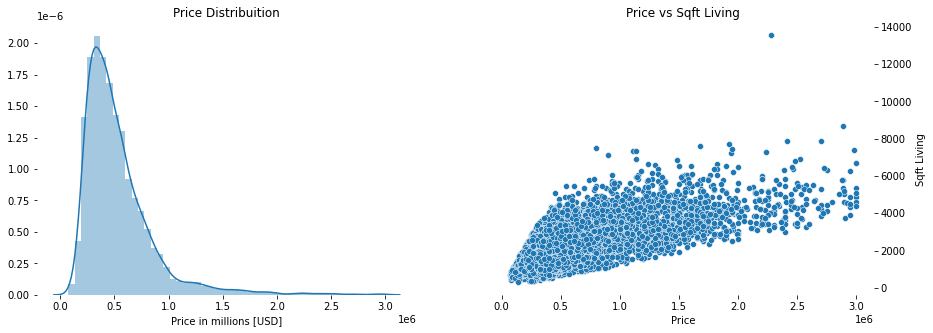

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.distplot(housePrices['price'], ax=axes[0])
sns.scatterplot(x='price',y='sqft_living', data=housePrices, ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Price in millions [USD]', ylabel='', title='Price Distribuition')
axes[1].set(xlabel='Price', ylabel='Sqft Living', title='Price vs Sqft Living')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Floors'),
 Text(0.5, 1.0, 'Floors vs Price Box Plot')]

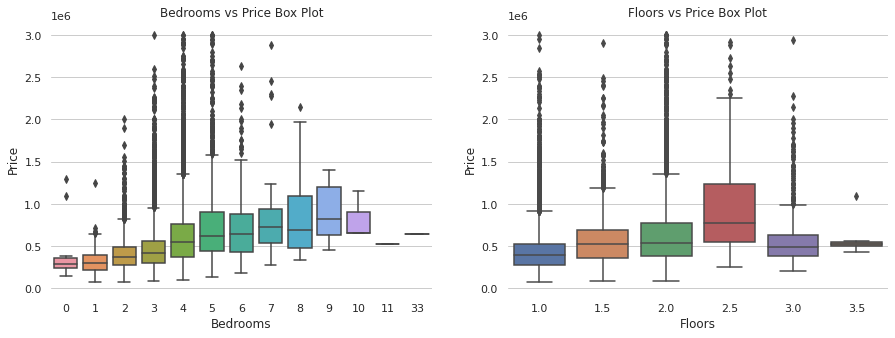

In [ ]:
sns.set(style="whitegrid", font_scale=1)

f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=housePrices['bedrooms'],y=housePrices['price'], ax=axes[0])
sns.boxplot(x=housePrices['floors'],y=housePrices['price'], ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Bedrooms', ylabel='Price', title='Bedrooms vs Price Box Plot')
axes[1].set(xlabel='Floors', ylabel='Price', title='Floors vs Price Box Plot')

[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Grade'),
 Text(0.5, 1.0, 'Grade vs Price Box Plot')]

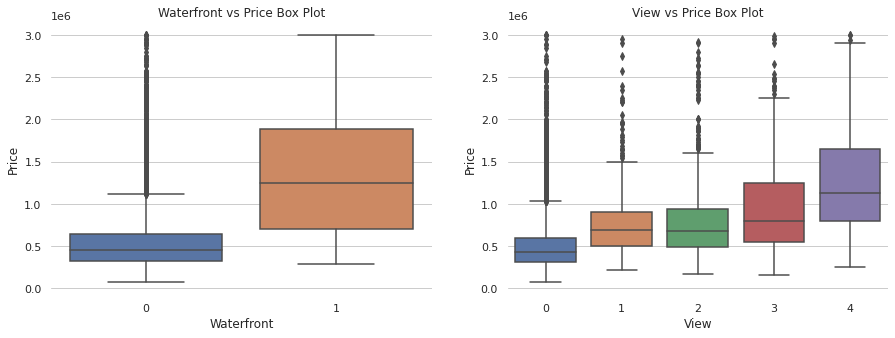

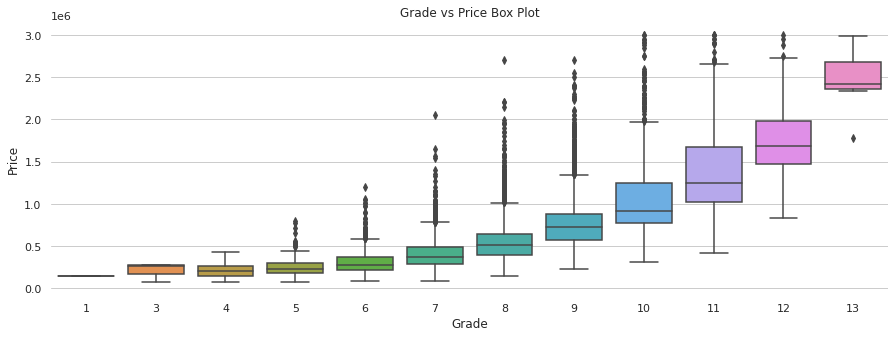

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=housePrices['waterfront'],y=housePrices['price'], ax=axes[0])
sns.boxplot(x=housePrices['view'],y=housePrices['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Waterfront', ylabel='Price', title='Waterfront vs Price Box Plot')
axes[1].set(xlabel='View', ylabel='Price', title='View vs Price Box Plot')

f, axe = plt.subplots(1, 1,figsize=(15,5))
sns.boxplot(x=housePrices['grade'],y=housePrices['price'], ax=axe)
sns.despine(left=True, bottom=True)
axe.set(xlabel='Grade', ylabel='Price', title='Grade vs Price Box Plot')

In [ ]:

housePrices = housePrices.drop('id',axis=1)
housePrices = housePrices.drop('zipcode',axis=1)
print(housePrices.columns.values)


['date' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors'
 'waterfront' 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement'
 'yr_built' 'yr_renovated' 'lat' 'long' 'sqft_living15' 'sqft_lot15']


In [ ]:
housePrices['date'] = pd.to_datetime(housePrices['date'])

housePrices['month'] = housePrices['date'].apply(lambda date:date.month)
housePrices['year'] = housePrices['date'].apply(lambda date:date.year)

housePrices = housePrices.drop('date',axis=1)

# Check the new columns
print(housePrices.columns.values)

['price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors'
 'waterfront' 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement'
 'yr_built' 'yr_renovated' 'lat' 'long' 'sqft_living15' 'sqft_lot15'
 'month' 'year']


[Text(0, 0.5, 'Price'), Text(0.5, 0, 'Month'), Text(0.5, 1.0, 'Price Trends')]

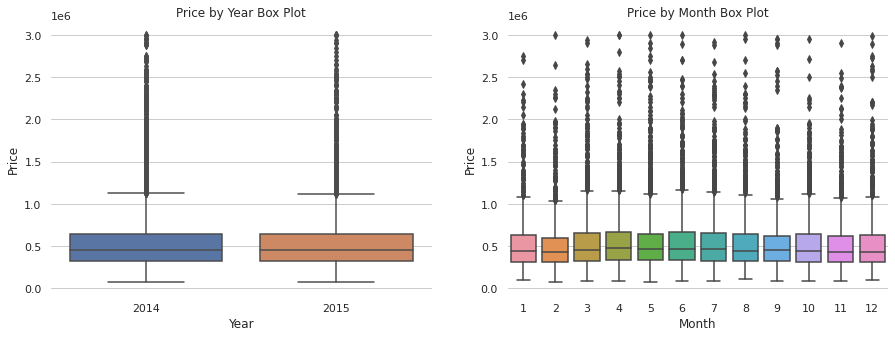

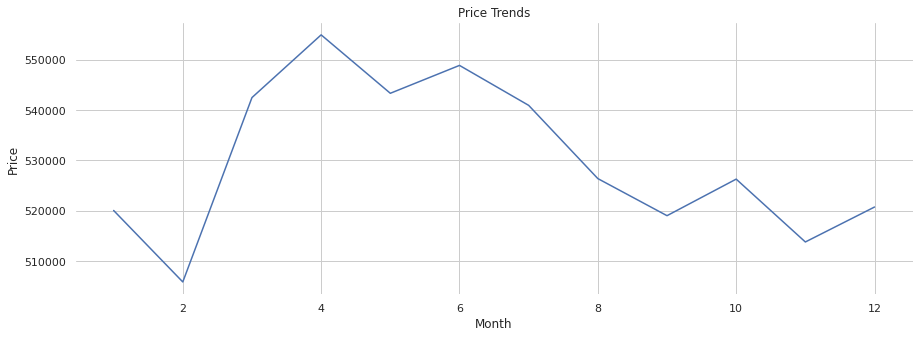

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x='year',y='price',data=housePrices, ax=axes[0])
sns.boxplot(x='month',y='price',data=housePrices, ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Year', ylabel='Price', title='Price by Year Box Plot')
axes[1].set(xlabel='Month', ylabel='Price', title='Price by Month Box Plot')

f, axe = plt.subplots(1, 1,figsize=(15,5))
housePrices.groupby('month').mean()['price'].plot()
sns.despine(left=True, bottom=True)
axe.set(xlabel='Month', ylabel='Price', title='Price Trends')

In [ ]:
# Features
X = housePrices.drop('price',axis=1)

# Label
y = housePrices['price']

# Split
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(15097, 19)
(6471, 19)
(15097,)
(6471,)


In [ ]:
# scaling and train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)

# transform for avoiding data leakage
X_valid = scaler.transform(X_valid)

# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.0000000000000002
Min:  0.0


In [ ]:
model = Sequential()

# input layer
model.add(Dense(19,activation='relu'))

# hidden layers
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

# output layer
model.add(Dense(1))  # This is the decision layer class or value depending on the need !

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_valid,y_valid.values),
          batch_size=128,epochs=400)


Epoch 1/400
118/118 [==============================] - 1s 5ms/step - loss: 394651271168.0000 - val_loss: 388652105728.0000
Epoch 2/400
118/118 [==============================] - 0s 3ms/step - loss: 392048181248.0000 - val_loss: 380101001216.0000
Epoch 3/400
118/118 [==============================] - 0s 4ms/step - loss: 361296461824.0000 - val_loss: 313845678080.0000
Epoch 4/400
118/118 [==============================] - 0s 3ms/step - loss: 240800530432.0000 - val_loss: 147797475328.0000
Epoch 5/400
118/118 [==============================] - 0s 3ms/step - loss: 101425471488.0000 - val_loss: 75628429312.0000
Epoch 6/400
118/118 [==============================] - 0s 3ms/step - loss: 77619920896.0000 - val_loss: 73486073856.0000
Epoch 7/400
118/118 [==============================] - 0s 3ms/step - loss: 76027658240.0000 - val_loss: 72069595136.0000
Epoch 8/400
118/118 [==============================] - 0s 3ms/step - loss: 74556309504.0000 - val_loss: 70651666432.0000
Epoch 9/400
118/118 [==

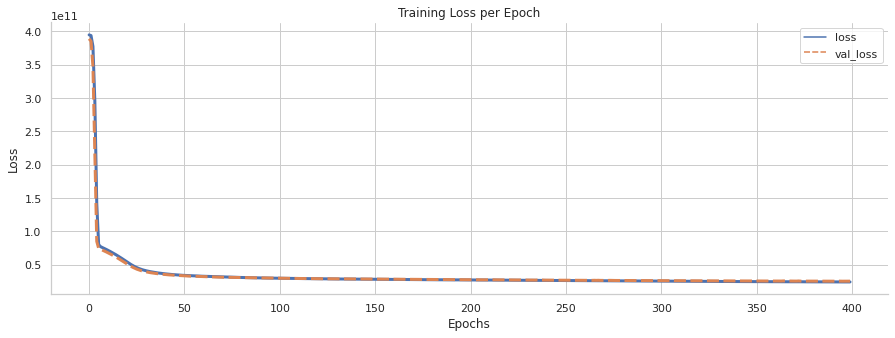

In [ ]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')
sns.despine()

In [ ]:
# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
# predictions on the test set
import numpy as np
predictions = model.predict(X_valid)

print('MAE: ', mean_absolute_error(y_valid,predictions))
print('MSE: ', mean_squared_error(y_valid,predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_valid,predictions)))
print('Variance Regression Score: ', explained_variance_score(y_valid,predictions))

print('\n\nDescriptive Statistics:\n',housePrices['price'].describe())

MAE:  102185.60419183153
MSE:  25612785134.88793
RMSE:  160039.94855937667
Variance Regression Score:  0.7573548534444425


Descriptive Statistics:
 count    2.156800e+04
mean     5.330554e+05
std      3.298346e+05
min      7.500000e+04
25%      3.210000e+05
50%      4.500000e+05
75%      6.410000e+05
max      3.000000e+06
Name: price, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 0, 'Test True Y'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

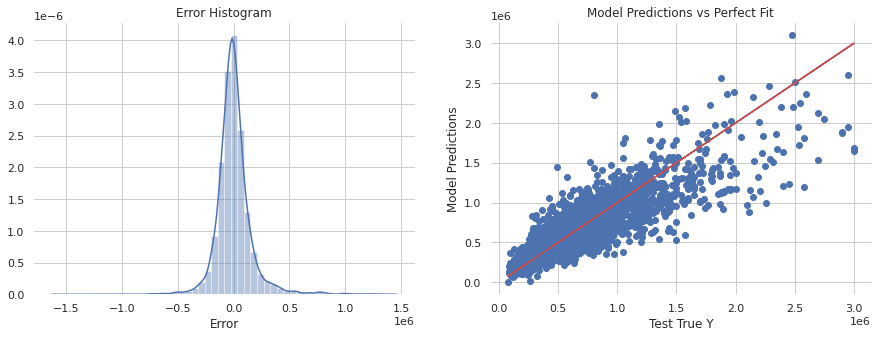

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(y_valid,predictions)

# Perfect predictions
plt.plot(y_valid,y_valid,'r')

errors = y_valid.values.reshape(6471, 1) - predictions
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

In [ ]:
# features of new house
single_house = housePrices.drop('price',axis=1).iloc[0]
print(f'Features of new house:\n {single_house}')

# reshape the numpy array and scale the features
single_house = scaler.transform(single_house.values.reshape(-1, 19))

# run the model and get the price prediction
print('\nPrediction Price:', model.predict(single_house)[0,0])

# original price
print('\nOriginal Price:', housePrices.iloc[0]['price'])

Features of new house:
 bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
month              10.0000
year             2014.0000
Name: 0, dtype: float64

Prediction Price: 279916.47

Original Price: 221900.0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
